<a href="https://colab.research.google.com/github/sejalbahirat/myfirstrepo/blob/main/KNN_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CSV Files/Iris.csv')
data.shape

(150, 6)

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# analyse the target columns
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
x = data.iloc[:, 1:-1]
y = data['Species']

In [ ]:
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

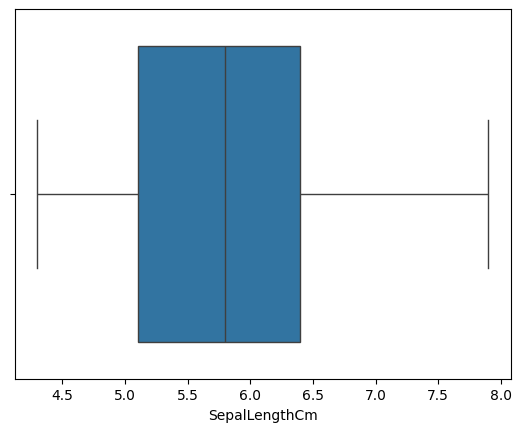

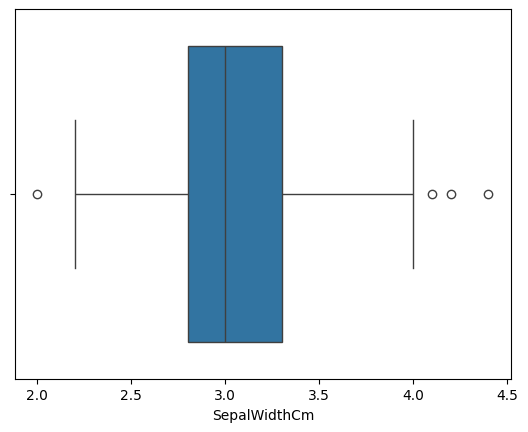

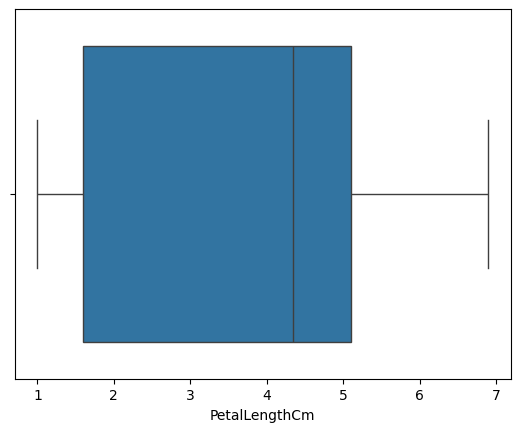

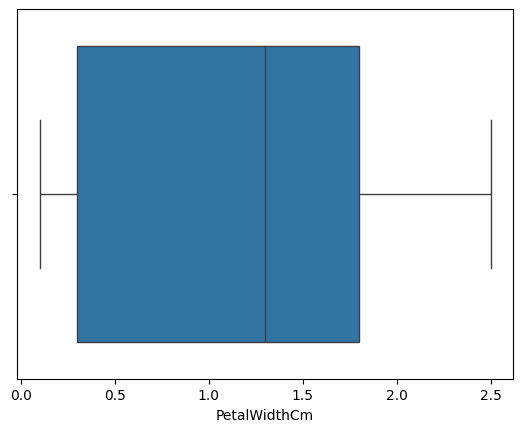

In [ ]:
for cols in x:
    sns.boxplot(x[cols], orient='h')
    plt.show()

In [ ]:
# outlier treatment
Q1 = x['SepalWidthCm'].quantile(0.25)
Q3 = x['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1
lf = Q1 - 1.5*IQR
uf = Q3 + 1.5*IQR

x['SepalWidthCm'] = np.where(x['SepalWidthCm'] < lf, lf, x['SepalWidthCm'])
x['SepalWidthCm'] = np.where(x['SepalWidthCm'] > uf, uf, x['SepalWidthCm'])

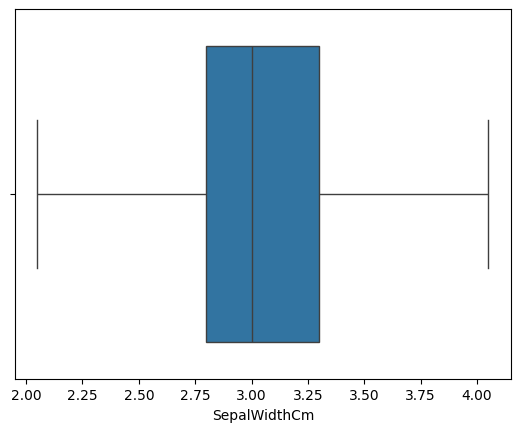

In [ ]:
sns.boxplot(x['SepalWidthCm'], orient='h')
plt.show()

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
# Data Scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# KNN Algo
from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1, 40): # not more than 50 neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test)) # mean misclassification rate- n neighbors = 1 1st case then misc otherwise all mean is zero

In [ ]:
error # well settled vals for 0 error

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.0]

In [ ]:
# 0.0 negligible error

In [ ]:
 # Data Standardization- scaling of data
 from sklearn.preprocessing import StandardScaler
 scale = StandardScaler()
 x_train_scaled = scale.fit_transform(x_train) #compute mean and find the value
 x_test_scaled = scale.transform(x_test) # subtract mean and divide by standard deviation

In [ ]:
print(x_test['SepalLengthCm'].mean())
print(x_test['SepalLengthCm'].std())

5.98
0.8450260146985071


In [ ]:
k_values = range(1, 20)
cv_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train_scaled, y_train, cv=10, scoring = 'accuracy')
    cv_score.append(score.mean())

In [ ]:
cv_score

[0.9416666666666667,
 0.925,
 0.9416666666666667,
 0.9333333333333333,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9583333333333333,
 0.95,
 0.9583333333333333,
 0.9583333333333333,
 0.95,
 0.9583333333333333,
 0.9416666666666667,
 0.9416666666666668,
 0.9333333333333332]

In [ ]:
optimal_k = k_values[cv_score.index(max(cv_score))]
print(optimal_k)

11


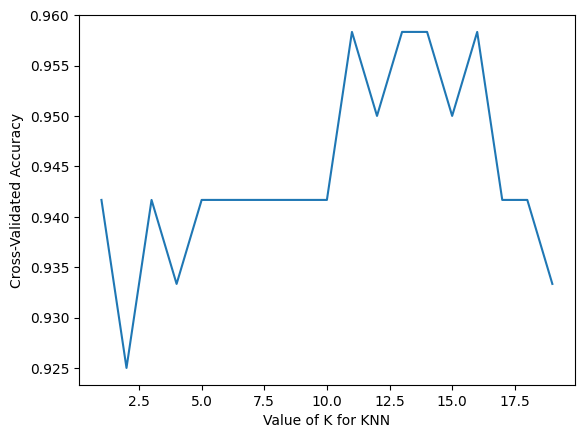

In [ ]:
plt.plot(k_values, cv_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
# Building a model with optimum k value
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train_scaled, y_train)
print(model.score(x_train_scaled, y_train))

0.95


In [ ]:
# prediction
y_pred = model.predict(x_test_scaled)

In [ ]:
# accuracy for prediction
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


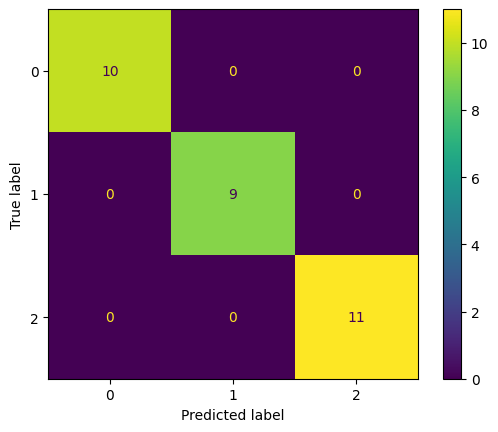

In [ ]:
# confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

